In [72]:
import numpy as np

In [73]:
def compute_error_for_line_given_points(b,m,points):
    total_error=0
    for i in range(0, len(points)):
        x= points[i,0]
        y = points[i,1]
        total_error += (y-(m*x+b))**2
    return total_error/float(len(points))


In [74]:
def step_gradient(b_current,m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x= points[i,0]
        y= points[i,1]
        b_gradient += -(2/N)*(y-((m_current*x)+b_current))
        m_gradient += -(2/N)*x*(y-((m_current*x)+b_current))
    new_b = b_current- (learning_rate* b_gradient)
    new_m = m_current-(learning_rate*m_gradient)
    return [new_b,new_m]



In [75]:
def gradient_descent_runner(points, starting_b, starting_m,learning_rate,num_iterations):
    b= starting_b
    m=starting_m
    for i in range(num_iterations):
        b,m = step_gradient(b, m, np.array(points),learning_rate)
    return [b,m]

    

In [83]:
def run():
    points = pd.read_csv('data_linear_regression.csv') 
    points = points.values
    #points = np.genfromtxt('data_linear_regression.csv',delimiter=',');
    learning_rate= 0.0001
    #line y=mx+b
    initial_b = 0;
    initial_m = 0;
    num_iterations = 1000
    [b,m] = gradient_descent_runner(points, initial_b, initial_m,learning_rate,num_iterations)
    print( "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

    
    

In [84]:
if __name__ == '__main__':
    run()

After 1000 iterations b = 0.10148121494753724, m = 1.4796491688889395, error = 111.01093662287167


In [85]:
import matplotlib.pyplot as plt

In [86]:
points = np.genfromtxt('data_linear_regression.csv',delimiter=',');


In [87]:
X=points[:,0]
Y=points[:,1]

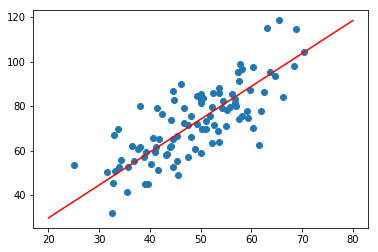

In [88]:
plt.scatter(X,Y)
x= np.linspace(20,80)
y=1.4796491688889395*x+0.10148121494753724
plt.plot(x,y,'-r')